In [156]:
import matplotlib.pyplot as plt
# we use sklearn to generate data and for the clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd

%matplotlib inline

In [158]:

df=pd.read_csv('College_Data', index_col=0)
df.loc[df['Grad.Rate']==118,'Grad.Rate']=100

kmeans = KMeans(n_clusters=2, n_init=1, init='random', random_state=42)
kmeans.fit(df.drop(columns='Private'))
centers = kmeans.cluster_centers_
print(centers)

from sklearn.preprocessing import LabelEncoder
label_e= LabelEncoder()
df['Cluster'] = label_e.fit_transform(df['Private'])
df.head(3)

k_labels= kmeans.labels_
print(k_labels)
conf_matrix = confusion_matrix(df['Cluster'], k_labels)
print(conf_matrix)
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
print(f'Genauigkeit: {accuracy:.2%}')


[[1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.50926756e+01]
 [1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 

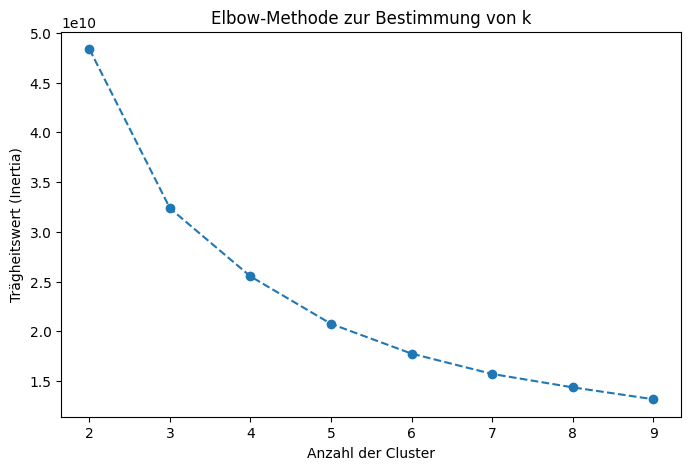

Cluster-Zentren: [[1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.50926756e+01]
 [1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]]
Silhouetten-Score: 0.56
Verwirrungsmatrix:
[[138  74]
 [531  34]]
Genauigkeit: 22.14%


In [159]:


# Daten laden und erste Spalte als Index setzen
df = pd.read_csv('College_Data', index_col=0)

# Fehlerhaften Wert in 'Grad.Rate' korrigieren
df.loc[df['Grad.Rate'] == 118, 'Grad.Rate'] = 100

# Features für das Clustering auswählen (ohne 'Private' und 'Cluster')
features = df.drop(columns=['Private'], errors='ignore')

# Anzahl der Cluster optimieren mit der Elbow-Methode
inertia = []
k_range = range(2, 10)  # Verschiedene Cluster-Anzahlen testen
for k in k_range:
    kmeans_test = KMeans(n_clusters=k, n_init=10, init='k-means++', random_state=42)
    kmeans_test.fit(features)
    inertia.append(kmeans_test.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Trägheitswert (Inertia)')
plt.title('Elbow-Methode zur Bestimmung von k')
plt.show()

# Clustering mit optimierten Parametern durchführen
kmeans = KMeans(n_clusters=2, n_init=50, init='k-means++', random_state=42)
kmeans.fit(features)
centers = kmeans.cluster_centers_
print("Cluster-Zentren:", centers)

# Silhouetten-Score ausgeben
silhouette_avg = silhouette_score(features, kmeans.labels_)
print(f'Silhouetten-Score: {silhouette_avg:.2f}')

# Label-Encoding der 'Private' Spalte für den Vergleich
df['Cluster'] = LabelEncoder().fit_transform(df['Private'])
k_labels = kmeans.labels_

# Verwirrungsmatrix erstellen
conf_matrix = confusion_matrix(df['Cluster'], k_labels)
print("Verwirrungsmatrix:")
print(conf_matrix)

# Falls Reihenfolge der Cluster vertauscht ist, Matrix umdrehen
if conf_matrix[0, 0] + conf_matrix[1, 1] < conf_matrix[0, 1] + conf_matrix[1, 0]:
    conf_matrix = conf_matrix[::-1, ::-1]

# Genauigkeit berechnen
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
print(f'Genauigkeit: {accuracy:.2%}')

# Alternative Clustering-Algorithmen testen (optional)
# z.B. DBSCAN, Agglomeratives Clustering, Gaussian Mixture Models

Cluster Zentren: [[-0.32661962 -0.30530339 -0.25143507 -0.49913749 -0.50267293 -0.22105053
  -0.03848678 -0.45792911 -0.37283453 -0.12172587  0.04875211 -0.49062908
  -0.47906195  0.23583839 -0.30713916 -0.42464126 -0.36177249]
 [ 0.54548844  0.50988814  0.41992248  0.83361106  0.83951561  0.36917718
   0.06427689  0.76478882  0.6226721   0.20329475 -0.08142105  0.81940114
   0.80008284 -0.39387442  0.51295406  0.70919469  0.60419735]]
KMeans Labels: [0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1

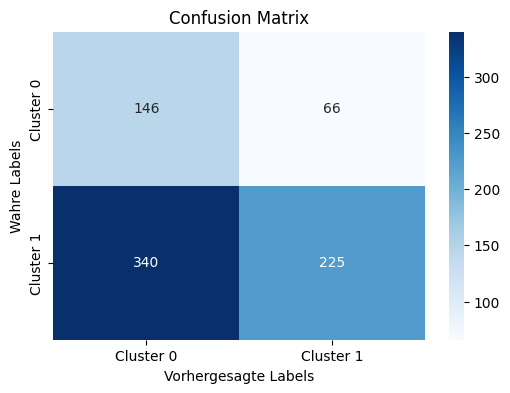

In [160]:


# Daten einlesen, erste Spalte als Index setzen
df = pd.read_csv('College_Data', index_col=0)

# Fehlerhafte Werte korrigieren (z. B. 118 auf 100 setzen)
df.loc[df['Grad.Rate'] == 118, 'Grad.Rate'] = 100

# **1. Standardisierung der Daten (wichtig für KMeans, da es mit Distanzen arbeitet)**
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['Private']))

# **2. KMeans mit verbesserter Initialisierung und mehreren Wiederholungen**
kmeans = KMeans(n_clusters=2, n_init=10, init='k-means++', random_state=42)
kmeans.fit(df_scaled)  # Verwenden der standardisierten Daten

# **3. Clusterzentren ausgeben**
centers = kmeans.cluster_centers_
print("Cluster Zentren:", centers)

# **4. Labels für Private in numerische Werte umwandeln**
label_e = LabelEncoder()
df['Cluster'] = label_e.fit_transform(df['Private'])

# **5. Vorhergesagte Cluster-Labels speichern**
k_labels = kmeans.labels_
print("KMeans Labels:", k_labels)

# **6. Confusion Matrix berechnen und ausgeben**
conf_matrix = confusion_matrix(df['Cluster'], k_labels)
print("Confusion Matrix:\n", conf_matrix)

# **7. Genauigkeit berechnen**
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
print(f'Genauigkeit: {accuracy:.2%}')

# **8. Visualisierung der Confusion Matrix**
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Cluster 0', 'Cluster 1'])
plt.xlabel('Vorhergesagte Labels')
plt.ylabel('Wahre Labels')
plt.title('Confusion Matrix')
plt.show()

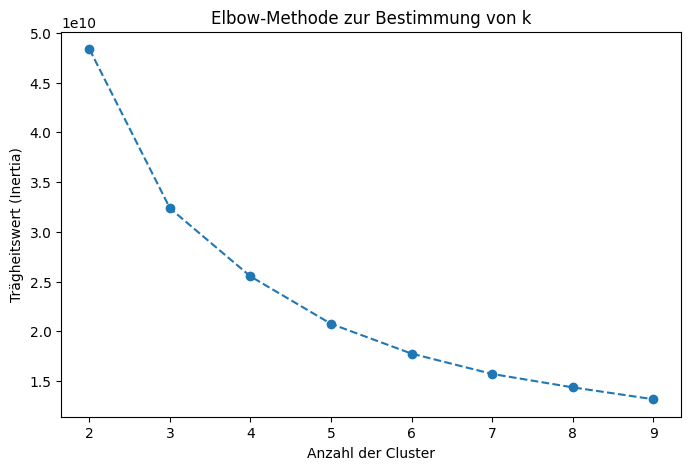

Cluster-Zentren: [[1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.50926756e+01]
 [1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]]
Silhouetten-Score: 0.56
Verwirrungsmatrix:
[[138  74]
 [531  34]]
Genauigkeit: 22.14%


In [161]:


# Daten laden und erste Spalte als Index setzen
df = pd.read_csv('College_Data', index_col=0)

# Fehlerhaften Wert in 'Grad.Rate' korrigieren
df.loc[df['Grad.Rate'] == 118, 'Grad.Rate'] = 100

# Features für das Clustering auswählen (ohne 'Private' und 'Cluster')
features = df.drop(columns=['Private'], errors='ignore')

# Anzahl der Cluster optimieren mit der Elbow-Methode
inertia = []
k_range = range(2, 10)  # Verschiedene Cluster-Anzahlen testen
for k in k_range:
    kmeans_test = KMeans(n_clusters=k, n_init=10, init='k-means++', random_state=42)
    kmeans_test.fit(features)
    inertia.append(kmeans_test.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Trägheitswert (Inertia)')
plt.title('Elbow-Methode zur Bestimmung von k')
plt.show()

# Clustering mit optimierten Parametern durchführen
kmeans = KMeans(n_clusters=2, n_init=50, init='k-means++', random_state=42)
kmeans.fit(features)
centers = kmeans.cluster_centers_
print("Cluster-Zentren:", centers)

# Silhouetten-Score ausgeben
silhouette_avg = silhouette_score(features, kmeans.labels_)
print(f'Silhouetten-Score: {silhouette_avg:.2f}')

# Label-Encoding der 'Private' Spalte für den Vergleich
df['Cluster'] = LabelEncoder().fit_transform(df['Private'])
k_labels = kmeans.labels_

# Verwirrungsmatrix erstellen
conf_matrix = confusion_matrix(df['Cluster'], k_labels)
print("Verwirrungsmatrix:")
print(conf_matrix)

# Falls Reihenfolge der Cluster vertauscht ist, Matrix umdrehen
if conf_matrix[0, 0] + conf_matrix[1, 1] < conf_matrix[0, 1] + conf_matrix[1, 0]:
    conf_matrix = conf_matrix[::-1, ::-1]

# Genauigkeit berechnen
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
print(f'Genauigkeit: {accuracy:.2%}')

# Alternative Clustering-Algorithmen testen (optional)
# z.B. DBSCAN, Agglomeratives Clustering, Gaussian Mixture Models